<a href="https://colab.research.google.com/github/avtar123/Credit-Card-Fraud/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/credit_card_fraud/train.csv')
test=pd.read_csv('/content/drive/MyDrive/credit_card_fraud/test.csv')

In [ ]:
train.head(10)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
5,5,0.0,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,...,-0.013418,0.210670,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97,0
6,6,0.0,1.206129,0.420150,-0.358910,1.037382,0.735224,-0.082449,0.568558,-0.158037,...,-0.366513,-1.113867,0.042265,-0.819477,0.473615,-0.639652,0.006812,0.016747,36.00,0
7,7,0.0,-1.074970,-0.297535,-0.884465,0.065341,-0.239956,0.349602,1.756880,0.054202,...,0.624183,0.908389,-0.233799,-0.457045,0.551736,-0.064708,0.137524,0.203869,440.00,0
8,8,0.0,2.154065,-0.000479,-2.125939,-0.121096,0.918473,-0.208507,0.226055,-0.236828,...,0.243716,0.780992,-0.148060,-0.280708,0.507044,-0.420133,-0.037652,-0.079346,1.00,0
9,9,0.0,2.172667,-0.704020,-1.447412,-0.715805,-0.530117,-1.007526,-0.436662,-0.176599,...,0.502916,1.442638,-0.063396,0.017817,0.270144,0.240989,-0.057164,-0.081458,10.00,0


In [ ]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [ ]:
#train.drop('id',axis=1,inplace=True)

In [ ]:
train.isnull().sum()


id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
(train.Class==1).sum()

469

In [ ]:
(train==0).sum()

id             1
Time          13
V1             1
V2             1
V3             0
V4             1
V5             0
V6             0
V7             0
V8             2
V9             1
V10            3
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            2
V18            0
V19            0
V20            1
V21            0
V22            0
V23            0
V24            4
V25            0
V26            0
V27            1
V28            2
Amount      1846
Class     218660
dtype: int64

<Axes: >

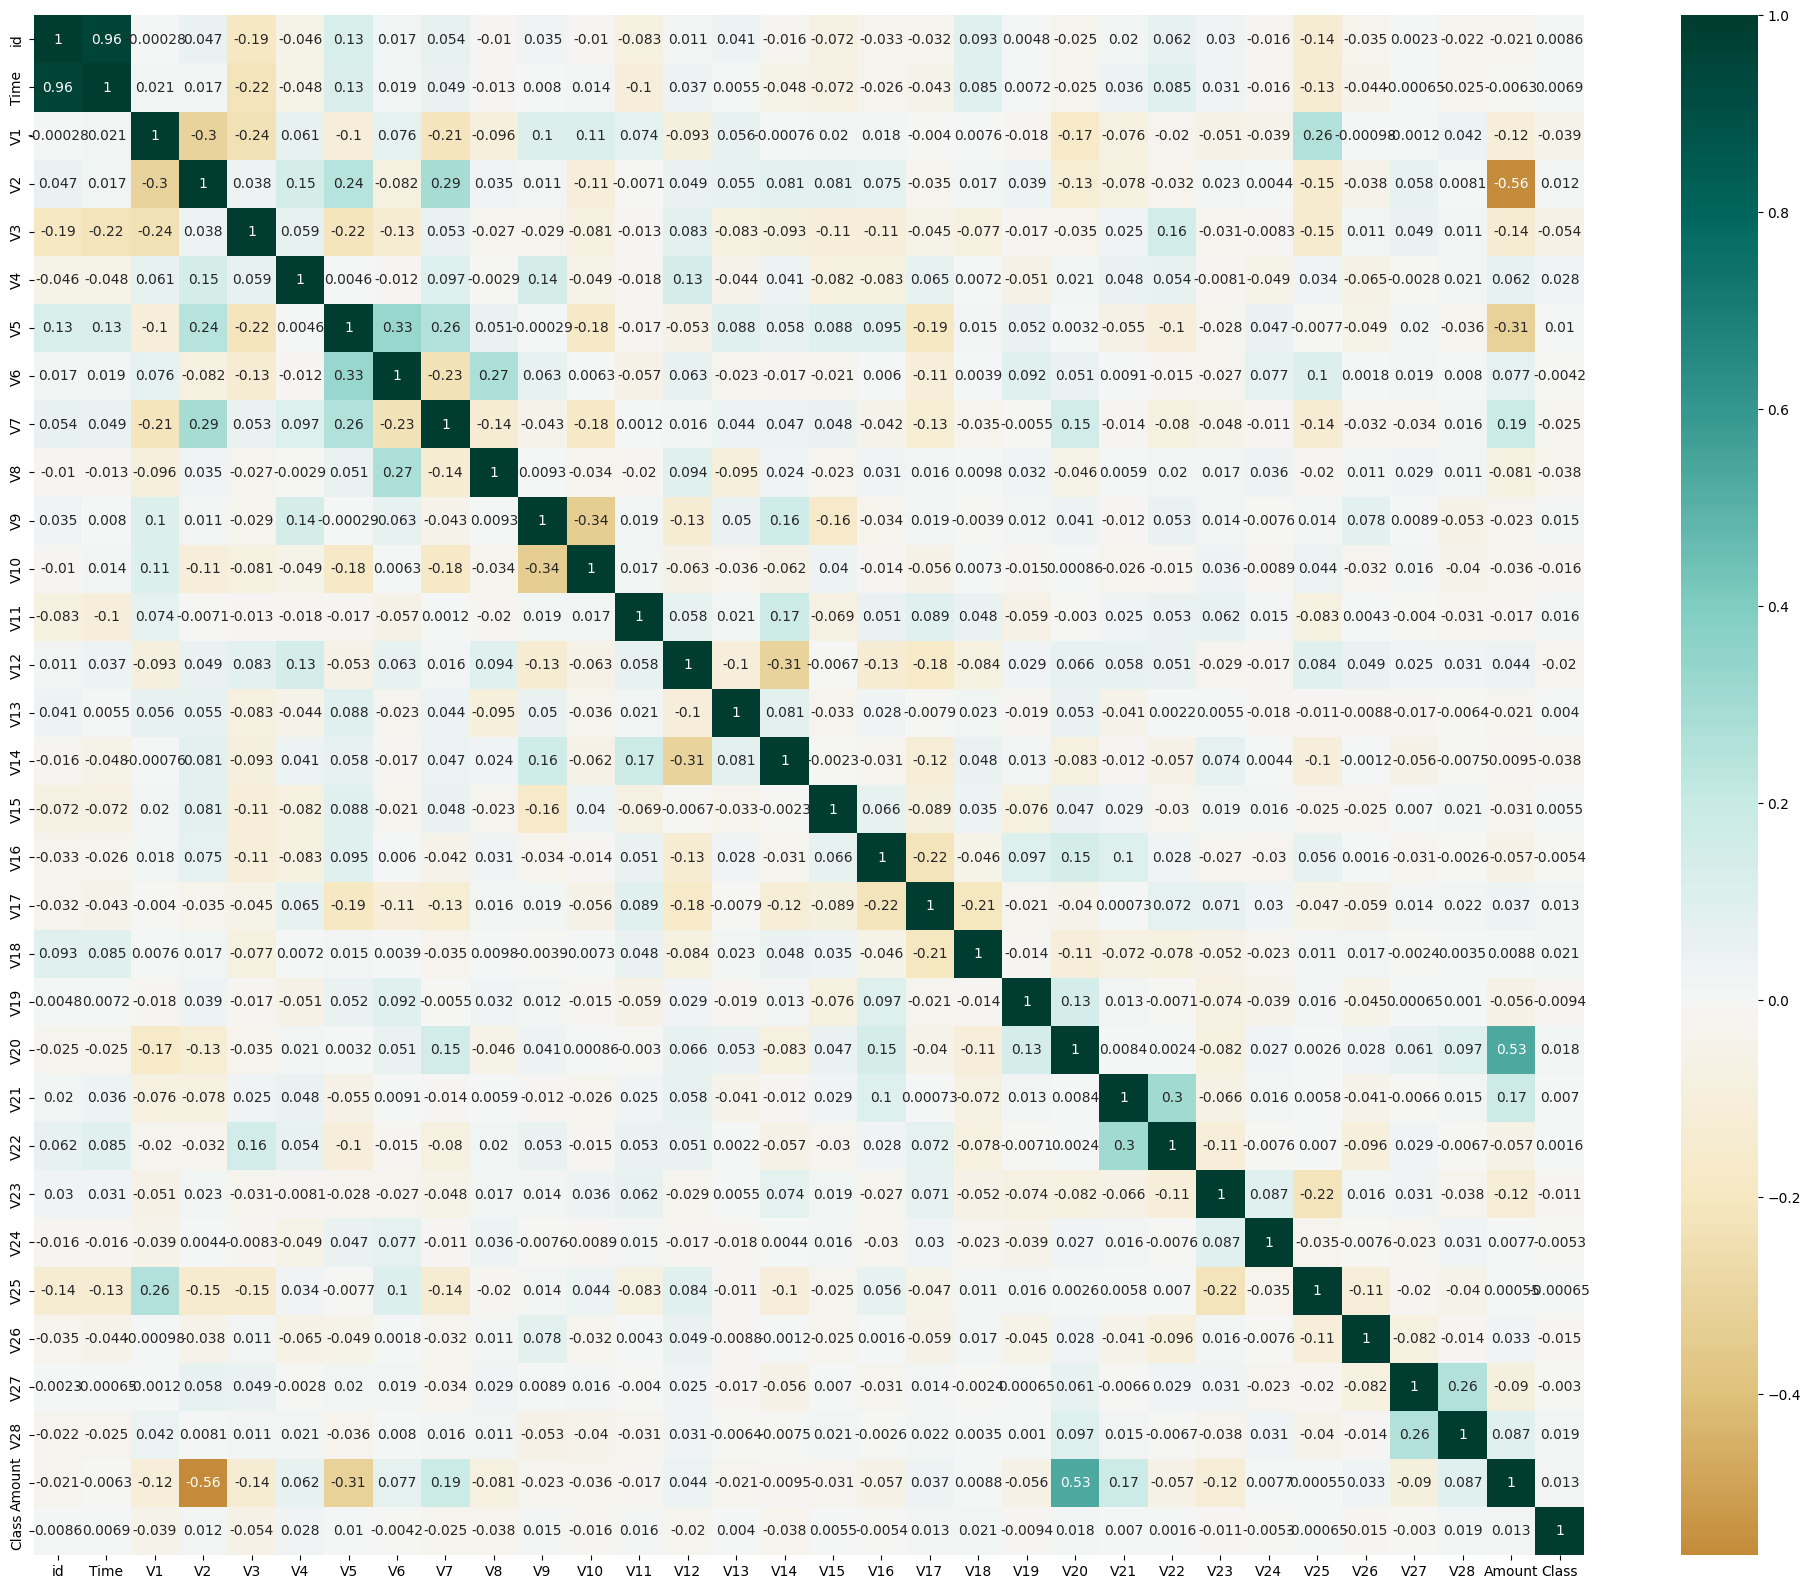

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)
heatmap

# Data undersampling **Technique**

In [ ]:
# separating the data for analysis
legit = train[train.Class == 0]
fraud = train[train.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(218660, 32)
(469, 32)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    218660.000000
mean         66.269651
std         149.935158
min           0.000000
25%           5.990000
50%          21.900000
75%          68.970000
max        7475.000000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     469.000000
mean      108.391002
std       376.603036
min         0.000000
25%         1.000000
50%         8.760000
75%        39.950000
max      4471.960000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
train.groupby('Class').mean()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,109538.948367,62369.241279,0.098545,0.047676,0.594936,0.067650,-0.162057,0.133923,-0.127294,0.150787,...,0.009338,-0.031200,-0.050896,-0.050369,-0.002846,0.124017,0.010218,0.014067,0.017167,66.269651
1,121243.722814,66188.392324,-1.086640,0.360162,-0.729018,0.826276,0.072711,0.024195,-0.562112,-0.434633,...,0.181932,0.032385,-0.030467,-0.125792,-0.071228,0.118310,-0.147291,-0.001152,0.085422,108.391002


In [ ]:
legit_sample = legit.sample(n=469)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27968,27968,35685.0,-0.369570,1.085473,1.289230,-0.068655,0.076112,-1.001110,0.748086,-0.170550,...,-0.267908,-0.734833,-0.015959,0.340780,-0.158802,0.071141,0.247581,0.098570,4.95,0
89786,89786,57789.0,-0.451337,-0.673098,1.156966,-2.493081,-0.296659,-0.877490,-0.280519,-0.160762,...,0.059847,0.611393,-0.146512,0.096499,-0.420119,-0.166839,0.068577,0.169826,16.47,0
54085,54085,47801.0,-0.086939,-0.679914,1.692614,-2.351838,-1.335858,-0.394829,-0.914787,0.045154,...,0.051357,0.583910,-0.145744,0.050281,-0.164449,-0.028035,0.114479,0.057958,14.40,0
164814,164814,77568.0,-1.057789,1.011647,1.003549,0.014416,0.506560,-0.913984,0.269527,0.381866,...,0.143715,0.287078,-0.227875,0.009959,0.002047,0.336516,-0.021517,0.052777,12.34,0
92552,92552,58754.0,-0.789944,0.816372,1.638582,-0.065772,-0.943309,1.011223,-0.964798,1.016529,...,0.405680,0.994451,0.177098,0.231616,-0.259855,0.372666,0.028087,-0.067360,21.80,0


In [ ]:
new_dataset.tail()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
218320,218320,120164.0,2.169813,-0.045807,-2.079652,0.207907,0.722241,-0.966274,0.564011,-0.381757,...,0.054715,0.235221,-0.041338,0.084528,0.363729,0.749486,-0.136626,-0.082399,6.99,1
218396,218396,120185.0,-11.419870,-39.517039,-15.773813,3.756988,-1.482355,-3.490795,-3.917593,0.865307,...,1.818999,0.936693,-0.072615,-0.664149,-0.494026,0.867453,-2.758080,0.185558,498.25,1
218404,218404,120188.0,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.367895,-0.073634,-0.231775,...,-0.099366,0.061036,-0.078629,0.009812,0.057939,-0.466157,0.049888,0.001680,229.99,1
218937,218937,120550.0,-1.330035,1.912497,0.058653,4.098485,0.555525,1.281339,-0.332319,1.016770,...,-0.380175,-1.235965,0.287937,-0.391235,-0.871630,0.080706,0.179565,-0.092588,20.00,1
219086,219086,120573.0,-0.782727,2.024849,-1.463908,-0.376548,0.818257,-1.642925,1.103517,-0.186599,...,0.193358,0.790499,-0.346460,-0.301637,-0.046713,-0.143881,0.500877,0.290859,1.00,1


In [ ]:
new_dataset.groupby('Class').mean()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,110959.208955,63139.443497,0.077865,0.174169,0.660282,0.136211,-0.175288,0.107459,-0.077482,0.157756,...,-0.006806,-0.042395,0.000431,-0.049178,0.038505,0.094072,0.011727,0.016778,0.017639,55.446141
1,121243.722814,66188.392324,-1.086640,0.360162,-0.729018,0.826276,0.072711,0.024195,-0.562112,-0.434633,...,0.181932,0.032385,-0.030467,-0.125792,-0.071228,0.118310,-0.147291,-0.001152,0.085422,108.391002


# Outlier removal technique

<ipython-input-83-cb13cc69d37d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


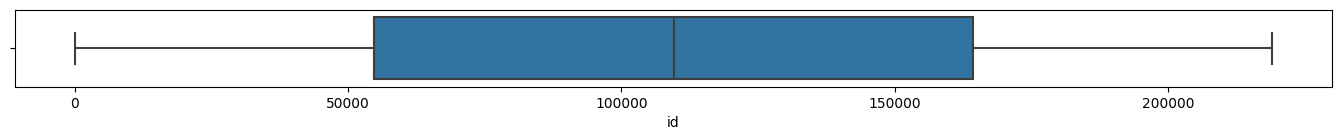

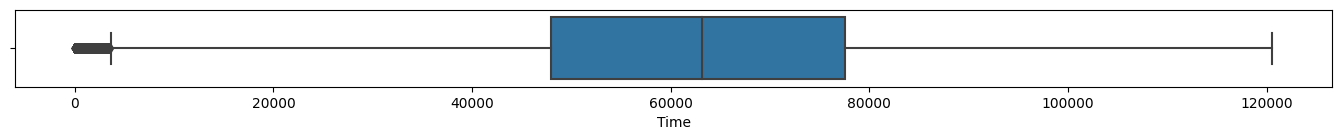

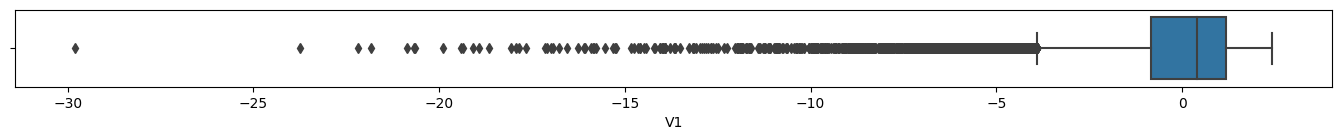

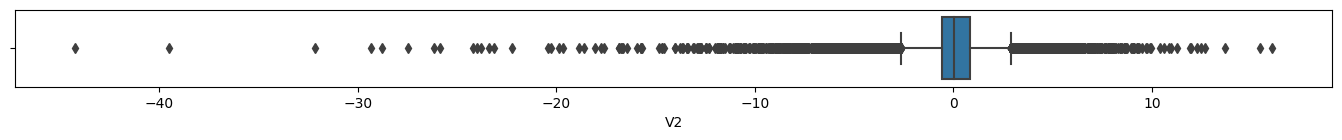

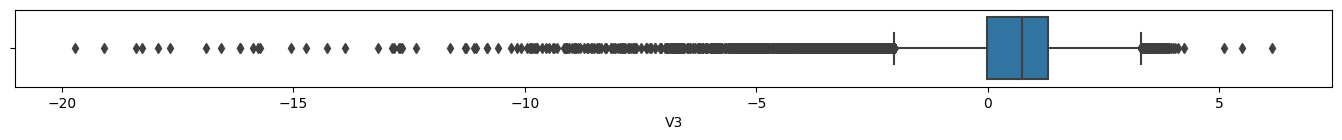

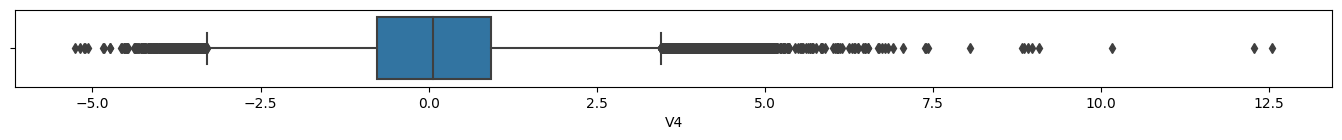

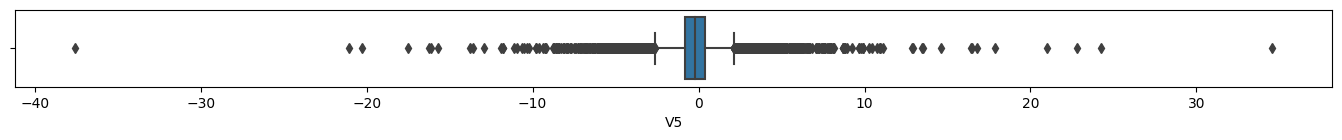

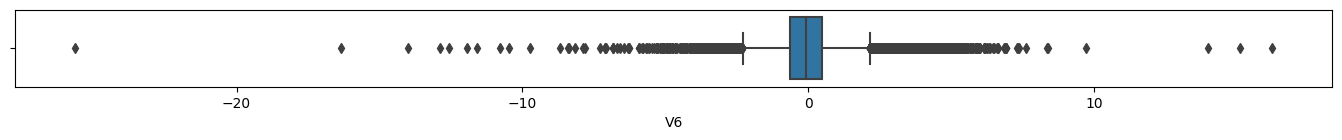

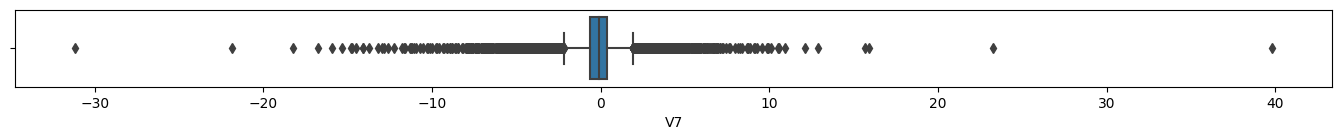

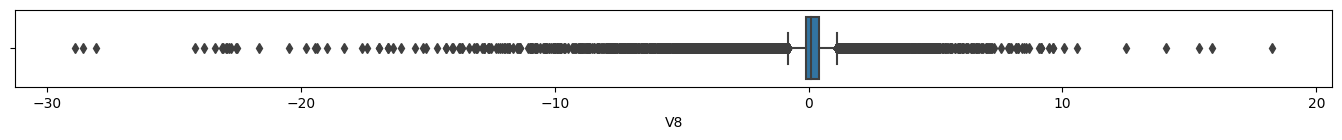

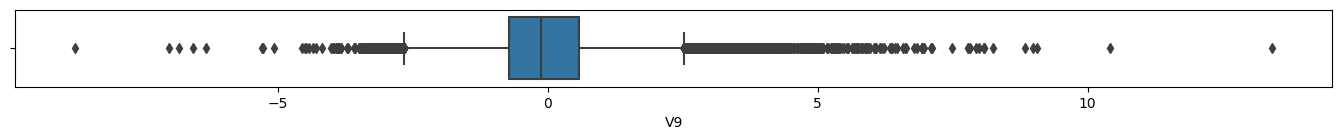

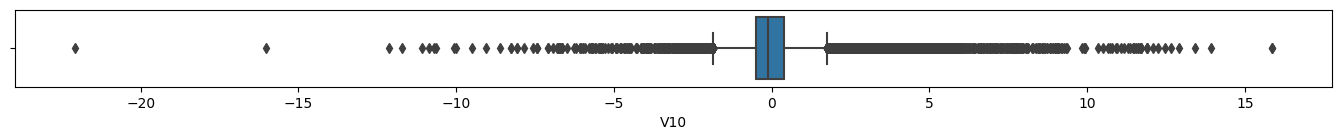

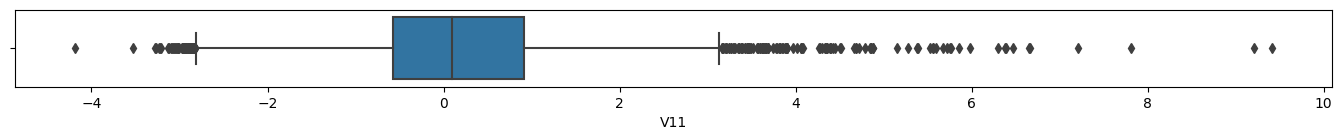

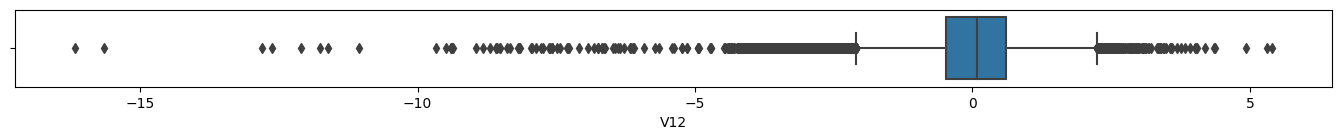

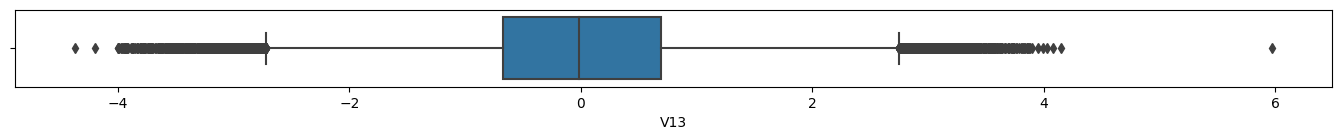

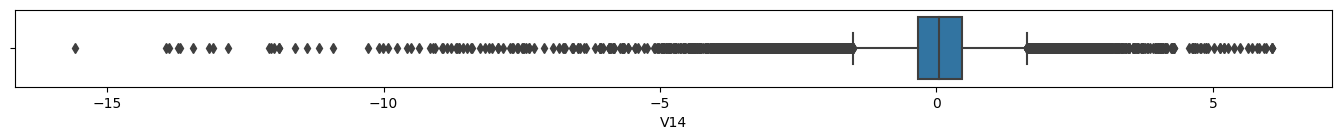

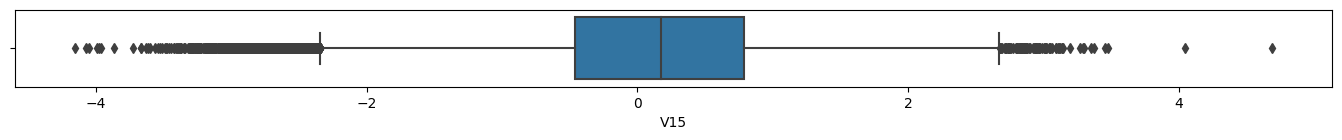

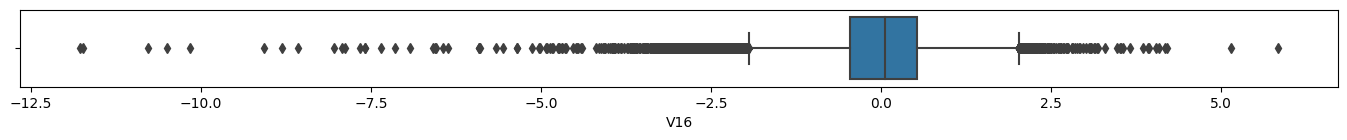

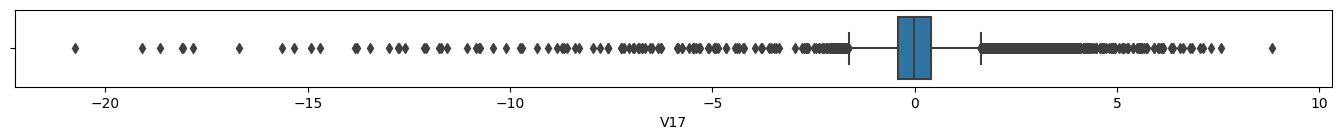

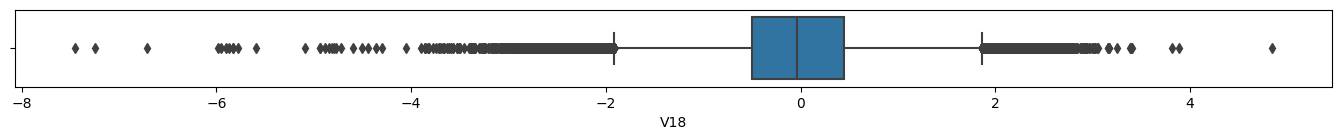

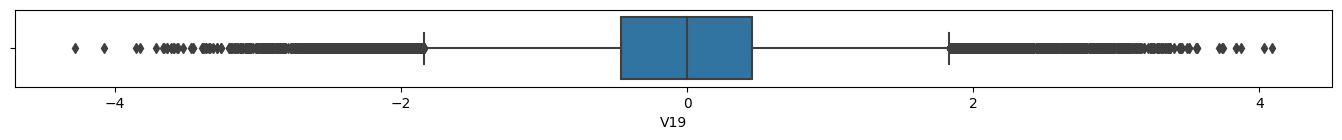

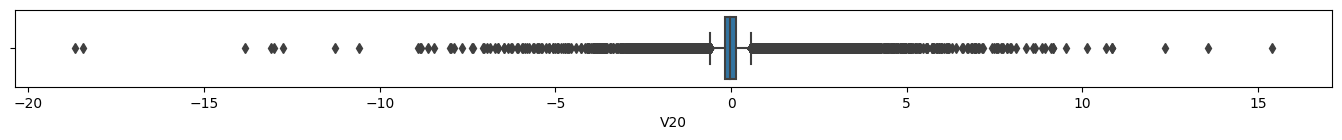

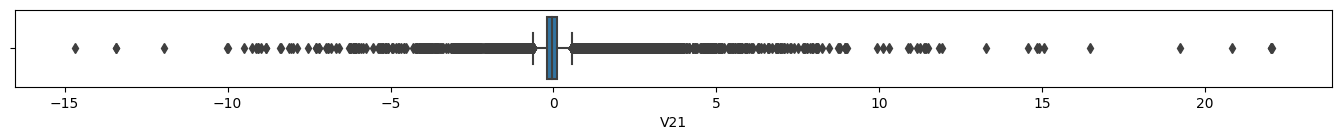

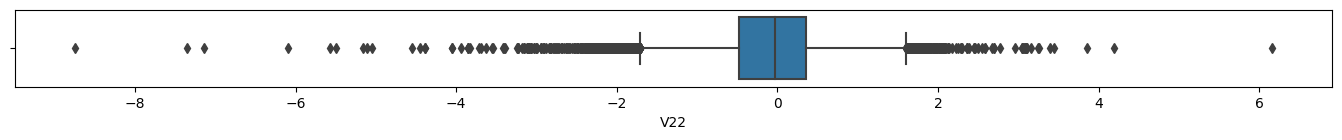

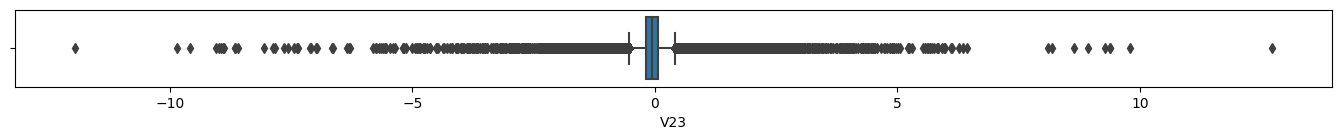

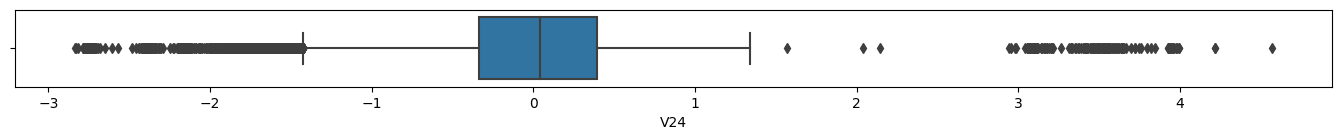

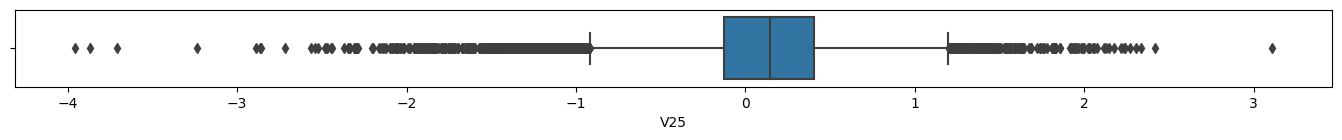

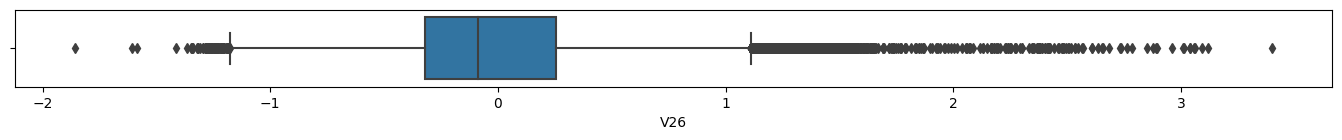

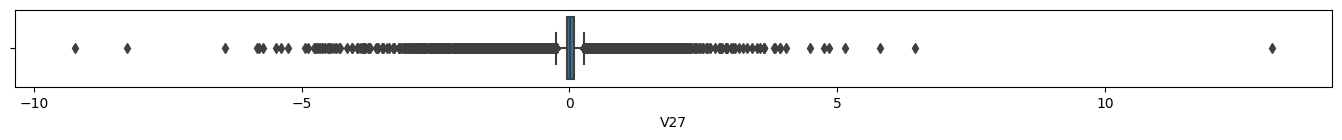

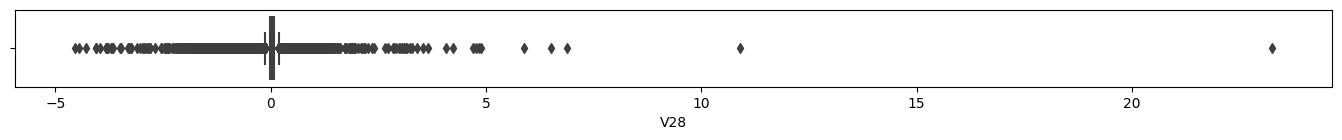

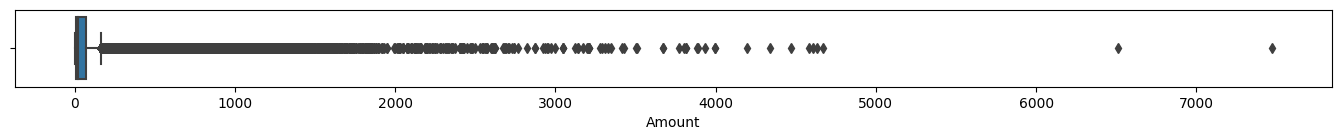

In [ ]:
# Box Plot
import seaborn as sns
for i in new_dataset.columns[:-1]:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train, x=i)


In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
#for i in li:
i='Amount'
Q1 = train[i].quantile(0.25)
Q3 = train[i].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train[i]>=upper)[0]
lower_array = np.where(train[i]<=lower)[0]
  # Check if indices are within the valid range
lower_indices = [idx for idx in lower_array if idx < len(train.index)]
upper_indices = [idx for idx in upper_array if idx < len(train.index)]

# Remove outliers with valid indices
train.drop(train.index[upper_indices], inplace=True)
train.drop(train.index[lower_indices], inplace=True)


  # Removing the outliers
  #train.drop(train.index[upper_array],inplace=True)
  #train.drop(train.index[lower_array],inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file into a DataFrame
df = train

# Step 2: Identify the feature columns and the target column
feature_columns = li  # Replace with your feature column names
target_column =  'Class'  # Replace with your target column name

# Step 3: Separate the data into two classes based on the target variable
class_0_data = df[df[target_column] == 0]
class_1_data = df[df[target_column] == 1]

# Step 4: Calculate the IQR and bounds for each class
q1_0 = class_0_data[feature_columns].quantile(0.25)
q3_0 = class_0_data[feature_columns].quantile(0.75)
iqr_0 = q3_0 - q1_0
lower_bound_0 = q1_0 - 1.5 * iqr_0
upper_bound_0 = q3_0 + 1.5 * iqr_0

q1_1 = class_1_data[feature_columns].quantile(0.25)
q3_1 = class_1_data[feature_columns].quantile(0.75)
iqr_1 = q3_1 - q1_1
lower_bound_1 = q1_1 - 1.5 * iqr_1
upper_bound_1 = q3_1 + 1.5 * iqr_1

# Step 5: Create boolean masks to identify outliers for each class
outlier_mask_0 = ((class_0_data[feature_columns] < lower_bound_0) | (class_0_data[feature_columns] > upper_bound_0)).any(axis=1)
outlier_mask_1 = ((class_1_data[feature_columns] < lower_bound_1) | (class_1_data[feature_columns] > upper_bound_1)).any(axis=1)

# Step 6: Remove the outlier rows from the DataFrame for each class
class_0_cleaned = class_0_data[~outlier_mask_0]
class_1_cleaned = class_1_data[~outlier_mask_1]

# Step 7: Concatenate the cleaned data for both classes back together
cleaned_data = pd.concat([class_0_cleaned, class_1_cleaned])

# Optionally, you can write the cleaned DataFrame back to a new CSV file
cleaned_data.to_csv('cleaned_file.csv', index=False)

In [ ]:
cleaned_data

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5797,5797,3601.0,1.148879,0.138857,1.248801,1.664600,-0.745498,-0.019879,-0.545023,0.017714,...,-0.261709,-0.215401,-0.054566,0.386530,0.519858,-0.341941,0.072714,0.031300,12.99,0
5799,5799,3612.0,1.043907,0.610048,1.020573,2.533967,0.102356,0.341865,-0.010966,0.063965,...,-0.192336,-0.455945,0.084726,-0.066597,0.192729,-0.111829,-0.021764,0.013538,38.03,0
5807,5807,3627.0,1.203029,0.175938,0.426706,0.771623,-0.307697,-0.333836,-0.271206,-0.012023,...,-0.511829,-1.150246,0.069076,-0.122602,0.264706,0.087237,-0.079884,-0.012912,12.95,0
5808,5808,3627.0,1.132760,0.527334,0.955384,1.569347,-0.490588,-0.648099,-0.098691,-0.183896,...,-0.363338,-0.794445,0.252781,0.638138,0.077977,0.042090,-0.006948,0.021707,0.00,0
5813,5813,3631.0,0.874378,-0.508927,1.477829,1.742308,-0.876991,1.082916,-0.918603,0.638126,...,-0.484423,-0.766683,-0.052559,0.146936,0.298926,-0.492875,0.052651,0.010712,65.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213743,213743,117859.0,-0.819182,1.051319,-0.966575,-0.832575,1.551624,-0.463819,0.849288,-0.167718,...,-0.361889,-0.746085,-0.031499,-0.069676,-0.390924,0.136898,0.067896,0.154922,0.89,1
216932,216932,119822.0,1.935174,0.362367,-2.925571,0.869887,1.054425,-0.958176,0.343078,-0.146727,...,0.079126,0.418469,-0.146778,0.520884,0.346618,0.704187,-0.060412,-0.017391,29.56,1
217132,217132,119844.0,2.041623,-0.063681,-1.534075,0.149832,0.430838,-0.271275,-0.270825,-0.085696,...,0.184889,0.734286,-0.125699,-0.826590,0.133795,0.727919,-0.046079,-0.033274,1.00,1
217502,217502,119906.0,2.039144,0.331717,-2.072626,0.292526,0.750169,-0.874537,0.346824,-0.346913,...,0.141648,0.609837,-0.160481,-1.085815,0.427282,-0.036478,0.026569,-0.024071,22.00,1


<ipython-input-83-ca9f022ea4c3>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


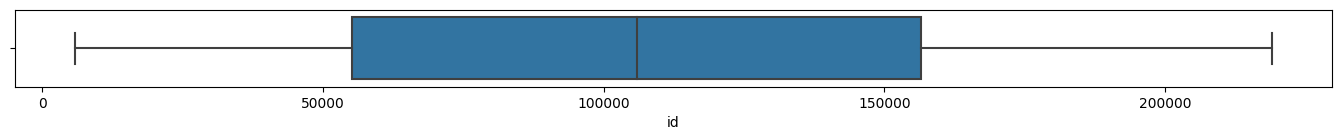

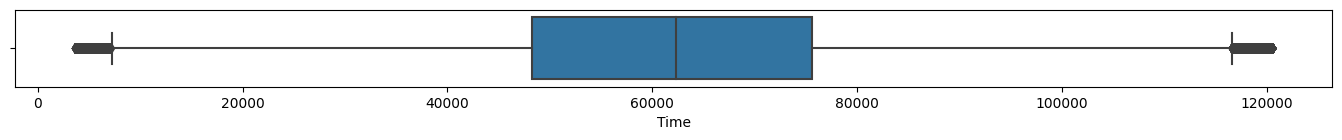

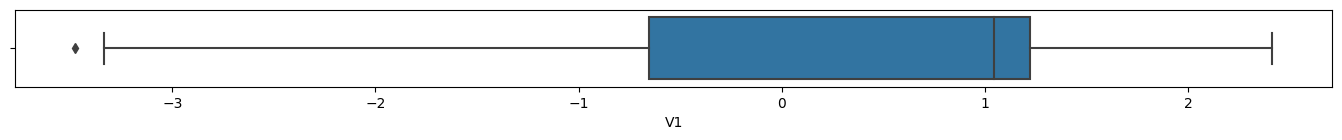

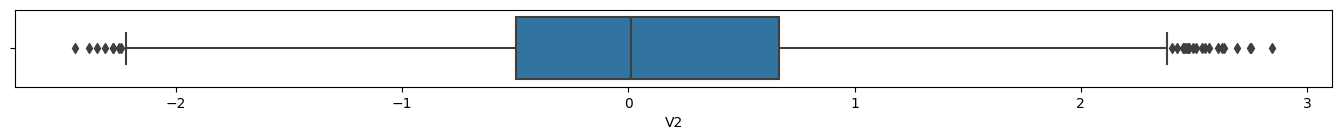

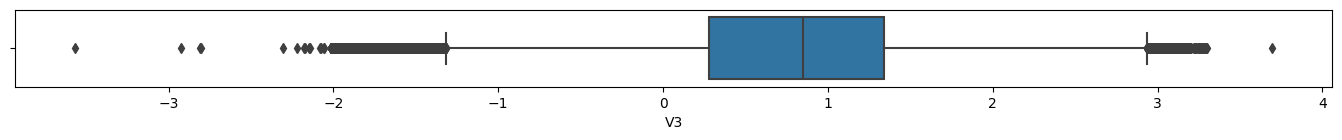

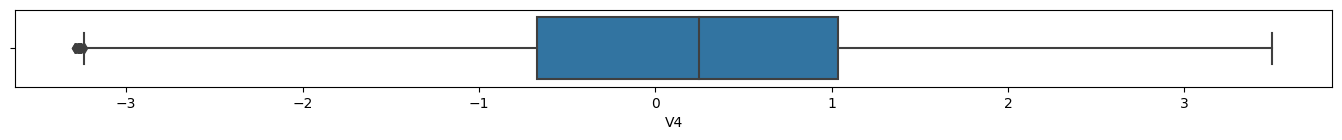

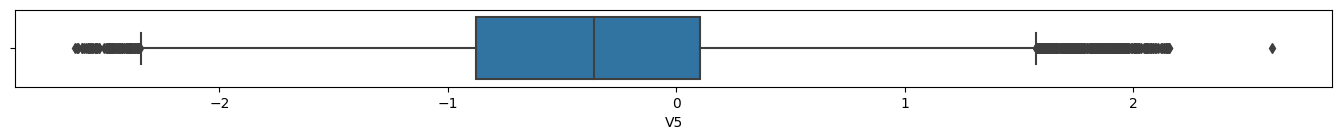

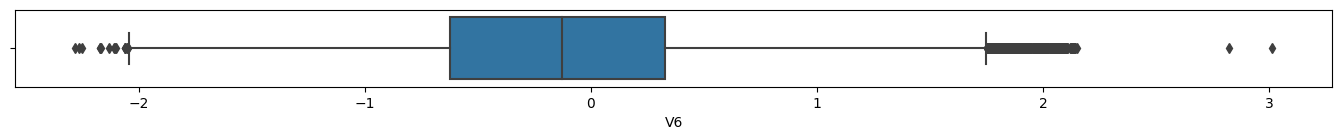

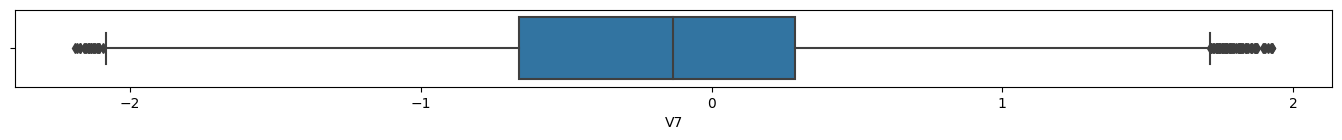

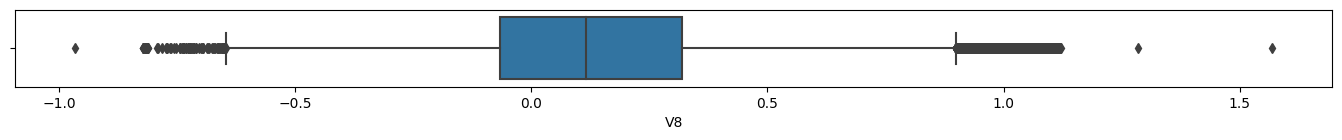

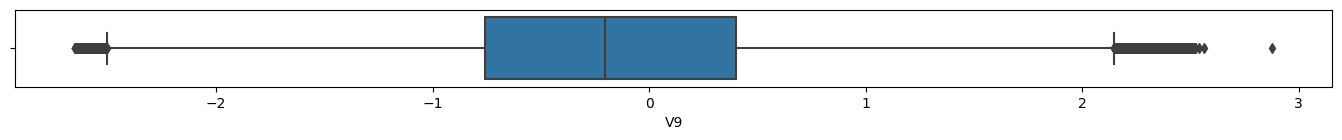

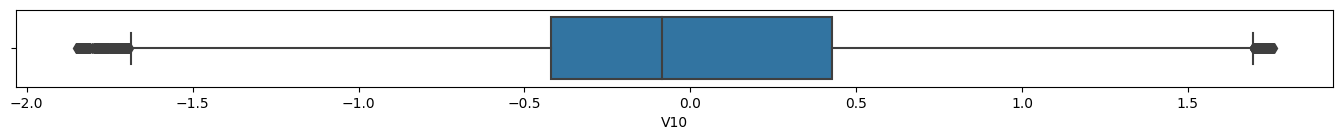

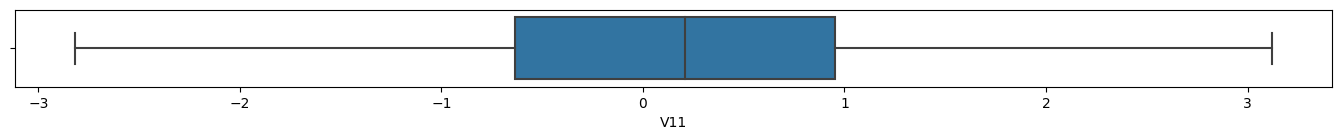

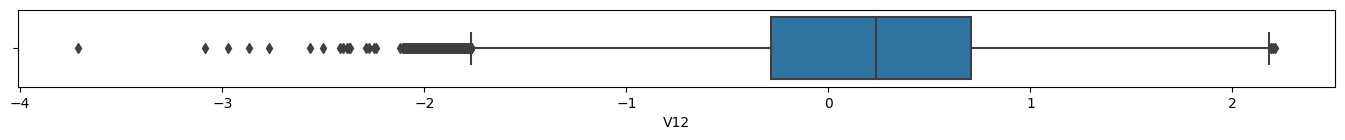

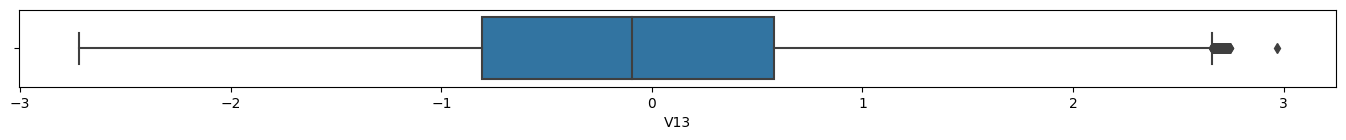

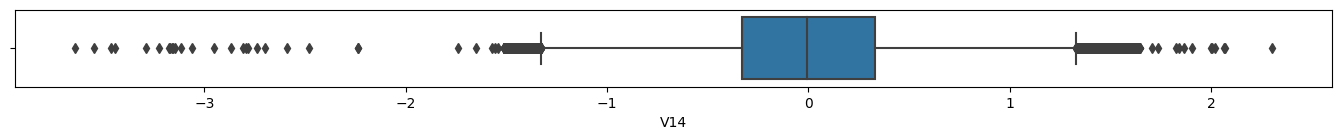

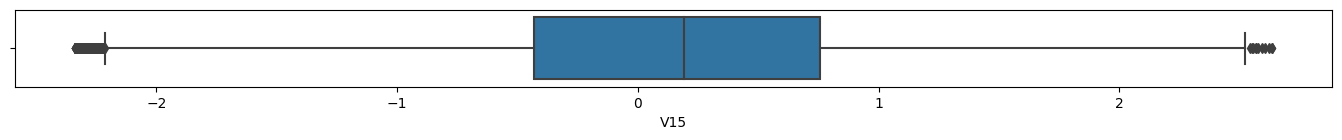

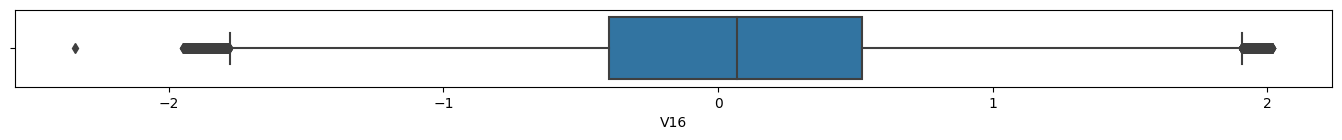

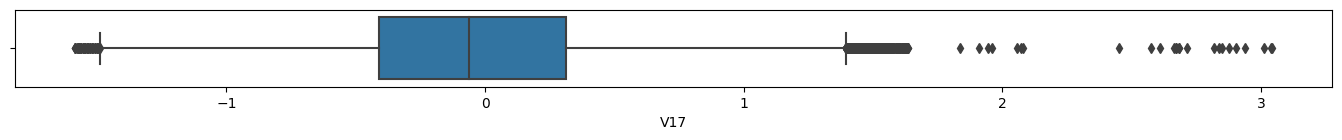

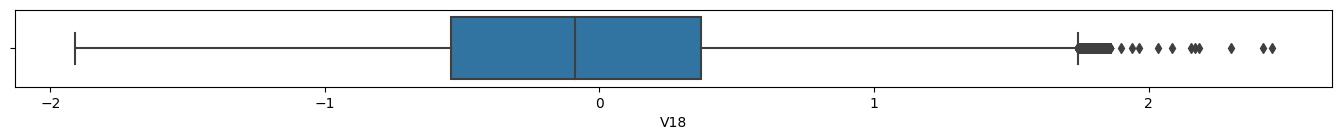

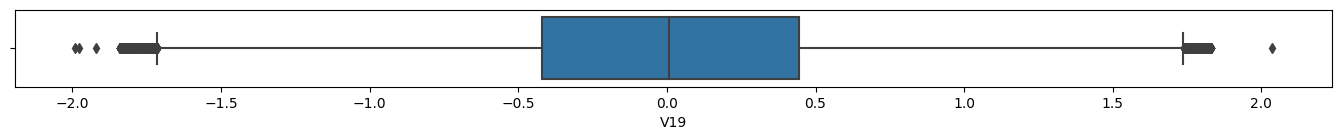

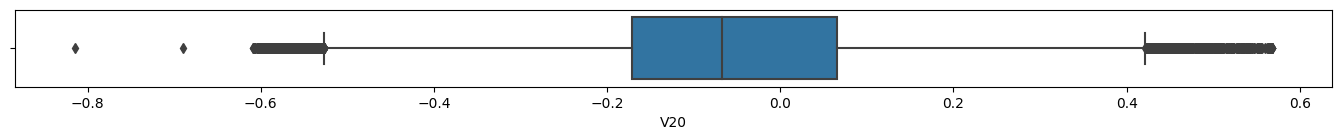

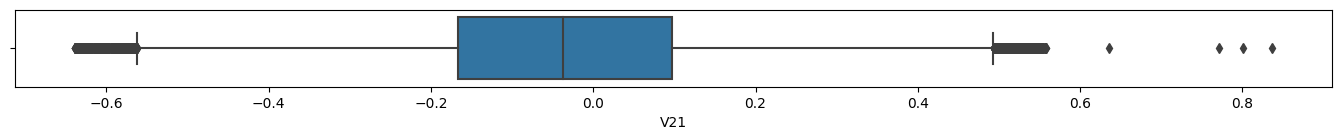

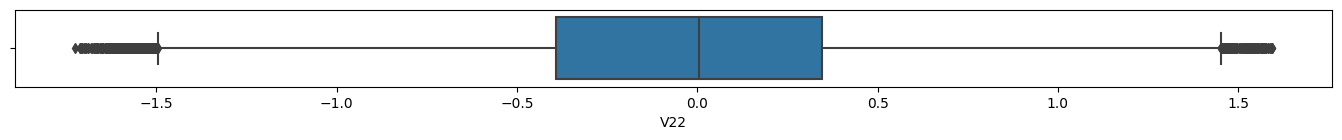

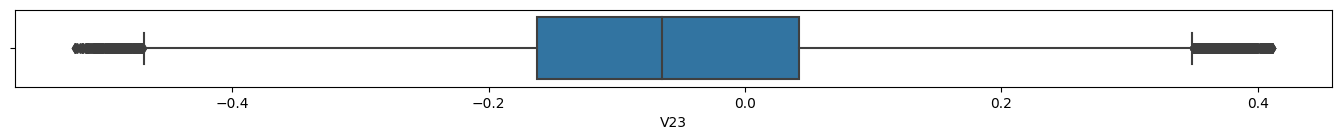

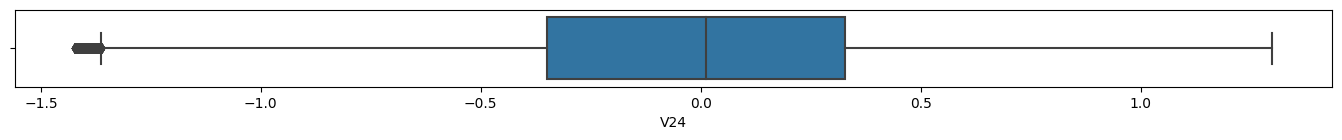

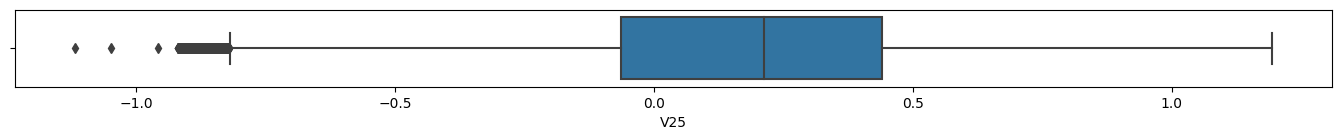

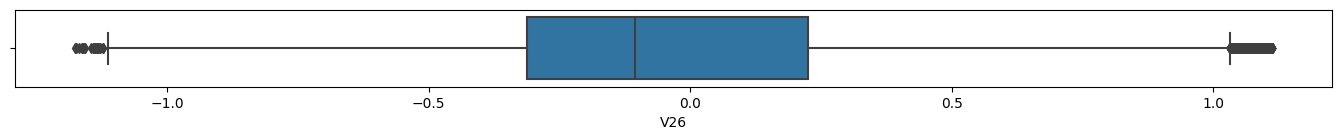

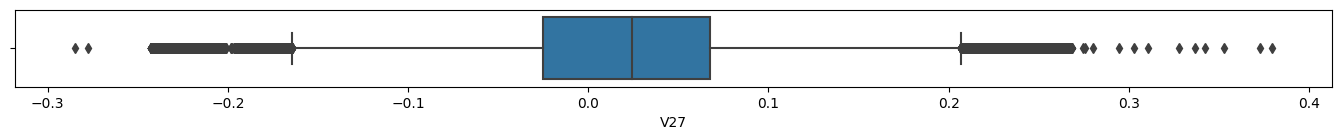

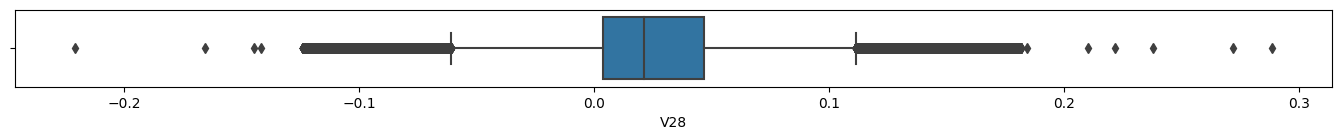

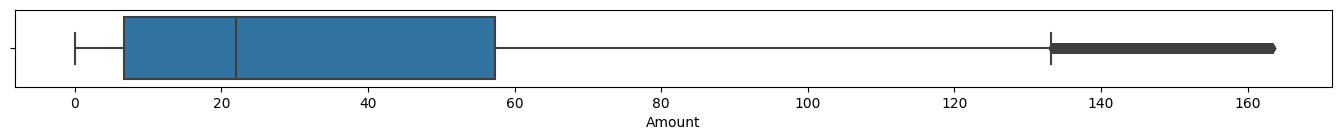

In [ ]:
# Box Plot
import seaborn as sns
for i in cleaned_data.columns[:-1]:
#sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=cleaned_data, x=i)

In [ ]:
cleaned_data.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,...,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000,107188.000000
mean,107161.704519,62286.773258,0.421090,0.055468,0.812999,0.189400,-0.375312,-0.124429,-0.169005,0.143602,...,-0.033028,-0.018451,-0.060117,-0.069466,0.181229,-0.005605,0.024100,0.025861,37.950974,0.001633
std,58161.182105,21007.439452,1.055717,0.761796,0.838897,1.146919,0.704784,0.645101,0.640447,0.293308,...,0.204202,0.547436,0.149205,0.499813,0.358471,0.437290,0.086690,0.053809,40.656211,0.040373
min,5797.000000,3601.000000,-3.480199,-2.446889,-3.569161,-3.291619,-2.633587,-2.283314,-2.190527,-0.967271,...,-0.639137,-1.725978,-0.522837,-1.422964,-1.119291,-1.176548,-0.284923,-0.221166,0.000000,0.000000
25%,55253.750000,48234.000000,-0.654716,-0.496461,0.277572,-0.672671,-0.876143,-0.622960,-0.663595,-0.067616,...,-0.166491,-0.390964,-0.162440,-0.349153,-0.063714,-0.311719,-0.025094,0.003650,6.700000,0.000000
50%,106023.500000,62347.000000,1.042193,0.013859,0.849085,0.245920,-0.361809,-0.128957,-0.132899,0.114728,...,-0.037363,0.005575,-0.064897,0.011290,0.213129,-0.104631,0.024036,0.021307,22.000000,0.000000
75%,156437.750000,75590.000000,1.219091,0.663736,1.341036,1.037530,0.103971,0.326883,0.287772,0.318862,...,0.097353,0.345943,0.042226,0.326972,0.441247,0.225828,0.067676,0.046724,57.320000,0.000000
max,219121.000000,120579.000000,2.414823,2.847022,3.697068,3.499928,2.609570,3.014117,1.929154,1.569558,...,0.837164,1.594916,0.411535,1.299859,1.194956,1.113502,0.379722,0.288813,163.400000,1.000000


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Step 1: Read the CSV file into a DataFrame
df = train

# Step 2: Identify the feature columns and the target column
feature_columns = li  # Replace with your feature column names
target_column = 'Class'  # Replace with your target column name

# Step 3: Separate the features and target
X = df[feature_columns]
y = df[target_column]

# Step 4: Apply SMOTE to balance the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Create a new DataFrame with the balanced data
balanced_df = pd.DataFrame(X_resampled, columns=feature_columns)
balanced_df[target_column] = y_resampled

# Optionally, you can write the balanced DataFrame to a new CSV file
balanced_df.to_csv('balanced_file.csv', index=False)


In [ ]:
balanced_df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.000000,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.980000,0
1,1,0.000000,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.000000,0
2,2,0.000000,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.690000,0
3,3,0.000000,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.000000,0
4,4,0.000000,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,164657,77556.355299,-0.004710,1.848344,-1.773721,1.150130,0.781575,-1.527833,0.940425,-0.366747,...,-0.118690,0.008476,-0.054818,-0.102862,0.073197,-0.353808,-0.131037,-0.266561,1.693168,1
437316,206959,111146.064528,1.061158,1.088054,-2.102174,0.747985,0.460996,-1.601211,0.317964,-0.120044,...,-0.243776,-0.359709,0.116497,0.182519,-0.055762,-0.279785,0.128200,-0.014645,5.301614,1
437317,183642,82583.500632,1.268735,-0.633158,-1.119165,-1.420390,1.238999,3.103384,-1.118406,0.817892,...,-0.024729,-0.201095,-0.146554,0.664733,0.805855,-0.367220,0.055336,0.051492,38.833499,1
437318,5502,2566.332594,-1.903869,1.058274,-1.432351,0.008162,3.049120,1.074215,0.692977,-0.685419,...,0.782972,-0.227692,-0.751955,0.481987,0.013650,-0.374278,0.634252,-0.290540,0.916973,1


In [ ]:
(train==0).sum()

id             1
Time          13
V1             1
V2             1
V3             0
V4             1
V5             0
V6             0
V7             0
V8             2
V9             1
V10            3
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            2
V18            0
V19            0
V20            1
V21            0
V22            0
V23            0
V24            4
V25            0
V26            0
V27            1
V28            2
Amount      1846
Class     218660
dtype: int64

In [ ]:
(balanced_df==1).sum()

id             0
Time           0
V1             3
V2             1
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount     13582
Class     107013
dtype: int64

In [ ]:
balanced_df[train.columns].hist(bins=25, figsize=(15, 15))

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>],
       [<Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>,
        <Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>],
       [<Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>, <A

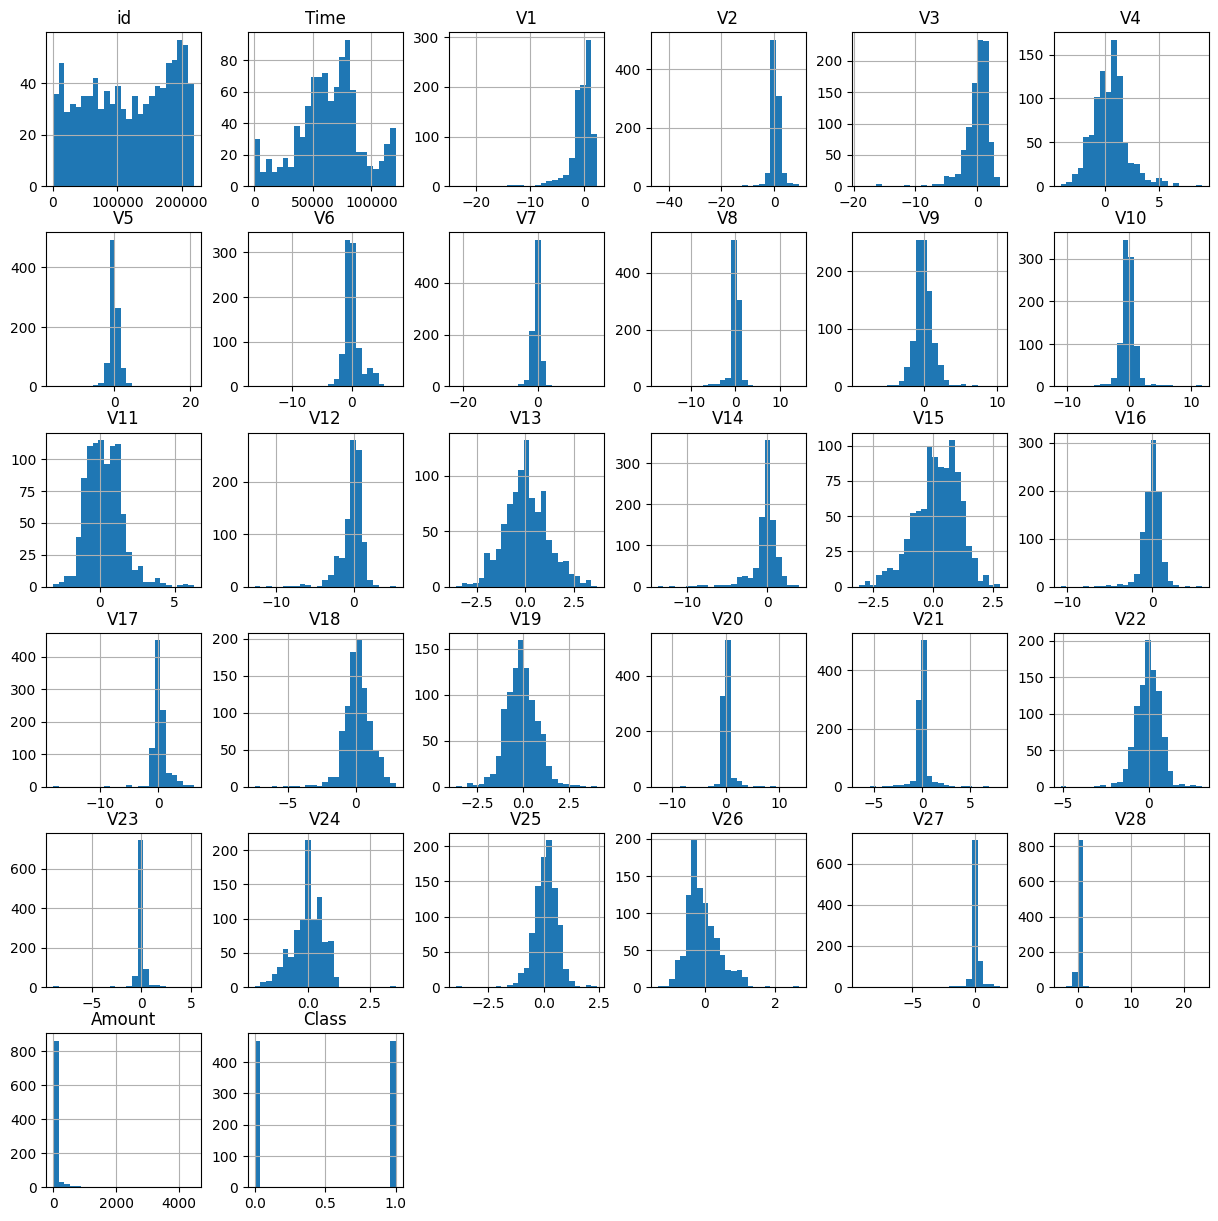

In [ ]:
new_dataset[new_dataset.columns].hist(bins=25, figsize=(15, 15))

In [ ]:
balanced_df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.000000,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.980000,0
1,1,0.000000,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.000000,0
2,2,0.000000,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.690000,0
3,3,0.000000,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.000000,0
4,4,0.000000,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437315,164657,77556.355299,-0.004710,1.848344,-1.773721,1.150130,0.781575,-1.527833,0.940425,-0.366747,...,-0.118690,0.008476,-0.054818,-0.102862,0.073197,-0.353808,-0.131037,-0.266561,1.693168,1
437316,206959,111146.064528,1.061158,1.088054,-2.102174,0.747985,0.460996,-1.601211,0.317964,-0.120044,...,-0.243776,-0.359709,0.116497,0.182519,-0.055762,-0.279785,0.128200,-0.014645,5.301614,1
437317,183642,82583.500632,1.268735,-0.633158,-1.119165,-1.420390,1.238999,3.103384,-1.118406,0.817892,...,-0.024729,-0.201095,-0.146554,0.664733,0.805855,-0.367220,0.055336,0.051492,38.833499,1
437318,5502,2566.332594,-1.903869,1.058274,-1.432351,0.008162,3.049120,1.074215,0.692977,-0.685419,...,0.782972,-0.227692,-0.751955,0.481987,0.013650,-0.374278,0.634252,-0.290540,0.916973,1


In [ ]:
X=new_dataset.iloc[:,:-1]

In [ ]:
X

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
27968,27968,35685.0,-0.369570,1.085473,1.289230,-0.068655,0.076112,-1.001110,0.748086,-0.170550,...,0.140859,-0.267908,-0.734833,-0.015959,0.340780,-0.158802,0.071141,0.247581,0.098570,4.95
89786,89786,57789.0,-0.451337,-0.673098,1.156966,-2.493081,-0.296659,-0.877490,-0.280519,-0.160762,...,-0.330170,0.059847,0.611393,-0.146512,0.096499,-0.420119,-0.166839,0.068577,0.169826,16.47
54085,54085,47801.0,-0.086939,-0.679914,1.692614,-2.351838,-1.335858,-0.394829,-0.914787,0.045154,...,-0.314936,0.051357,0.583910,-0.145744,0.050281,-0.164449,-0.028035,0.114479,0.057958,14.40
164814,164814,77568.0,-1.057789,1.011647,1.003549,0.014416,0.506560,-0.913984,0.269527,0.381866,...,0.023927,0.143715,0.287078,-0.227875,0.009959,0.002047,0.336516,-0.021517,0.052777,12.34
92552,92552,58754.0,-0.789944,0.816372,1.638582,-0.065772,-0.943309,1.011223,-0.964798,1.016529,...,-0.099360,0.405680,0.994451,0.177098,0.231616,-0.259855,0.372666,0.028087,-0.067360,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218320,218320,120164.0,2.169813,-0.045807,-2.079652,0.207907,0.722241,-0.966274,0.564011,-0.381757,...,-0.286788,0.054715,0.235221,-0.041338,0.084528,0.363729,0.749486,-0.136626,-0.082399,6.99
218396,218396,120185.0,-11.419870,-39.517039,-15.773813,3.756988,-1.482355,-3.490795,-3.917593,0.865307,...,8.387595,1.818999,0.936693,-0.072615,-0.664149,-0.494026,0.867453,-2.758080,0.185558,498.25
218404,218404,120188.0,1.708900,-1.003900,-1.531147,-0.173086,-0.430068,-0.367895,-0.073634,-0.231775,...,-0.227253,-0.099366,0.061036,-0.078629,0.009812,0.057939,-0.466157,0.049888,0.001680,229.99
218937,218937,120550.0,-1.330035,1.912497,0.058653,4.098485,0.555525,1.281339,-0.332319,1.016770,...,0.171426,-0.380175,-1.235965,0.287937,-0.391235,-0.871630,0.080706,0.179565,-0.092588,20.00


In [ ]:
y=new_dataset.iloc[:,-1:]

In [ ]:
y

,Class
27968,0
89786,0
54085,0
164814,0
92552,0
...,...
218320,1
218396,1
218404,1
218937,1


All imports regarding

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Logistic Regression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_pred, Y_test)

0.7180851063829787

In [ ]:
# Assuming you have ground truth labels (y_true) and predicted labels (y_pred)
precision = precision_score(y, y_pred)
precision

0.7950138504155124

In [ ]:
recall_score(y,y_pred)

0.6119402985074627

In [ ]:
f1_score(y,y_pred)

0.6961722488038278

In [ ]:
y_train_pred_log=clf.predict(train.iloc[:,1:-1])

In [ ]:
f1_score(train.iloc[:,-1:], y_train_pred_log)

0.016092285508291275

In [ ]:
y_test_log=clf.predict(test.iloc[:,1:])


In [ ]:
data_save = pd.DataFrame({"id":test['id'],"Class":y_test_log})
data_save.to_csv("Credit_Card_log1.csv",index=False)

# SVM

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
svm.score(X,y)

0.9940427798491772

In [ ]:
y_pred_svm=svm.predict(X)

In [ ]:
train.iloc[:,1:-1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65
219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00
219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79
219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,...,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00


In [ ]:
precision = precision_score(y, y_pred_svm)
precision

0.988433325326583

In [ ]:
y_train_pred_svm=svm.predict(train.iloc[:,1:-1])

In [ ]:
precision_on_train = precision_score(train.iloc[:,-1:], y_train_pred_svm)
precision_on_train

0.049873203719357564

In [ ]:
recall_score(train.iloc[:,-1:], y_train_pred_svm)

0.3773987206823028

In [ ]:
f1_score(train.iloc[:,-1:], y_train_pred_svm)

0.08810353409656546

In [ ]:
test.iloc[:,1:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,0.698829,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,0.095958,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,0.331706,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,-0.556087,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [ ]:
test

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,365211,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,365212,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,365213,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,365214,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [ ]:
y_test=svm.predict(test.iloc[:,1:])

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"Class":y_test})
data_save.to_csv("Credit_Card.csv",index=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,
                        n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

# xgboost

In [ ]:
X=train.iloc[:,1:-1]

In [ ]:
X

In [ ]:
y=train.iloc[:,-1:]

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_yhat = xgb.predict(X)

In [ ]:
f1_score(y,xgb_yhat)

0.4895330112721417

In [ ]:
y_test_XGB=xgb.predict(test.iloc[:,1:])

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"Class":y_test_XGB})
data_save.to_csv("Credit_Card_XGB1.csv",index=False)